In [87]:

stamp = "3683"

save_dir ="tex/"

batches = {
    "SG0": {"name": "sketch_generator0", "batch_id": f"{stamp}0_batch"},
    "SG1": {
        "name": "sketch_generator1",
        "batch_id": f"{stamp}1_batch",
    },
    "SG2": {
        "name": "sketch_generator2",
        "batch_id": f"{stamp}2_batch",
    },
}

## Printing statistics


In [88]:
import pandas as pd
import numpy as np
from tabulate import tabulate  # Add this import

# from tabulate import tabulate  # for nice table formatting


def calculate_stats(df, column):
    """Calculate basic statistics for a given column"""
    return {
        "average": df[column].mean(),
        "minimum": df[column].min(),
        "maximum": df[column].max(),
        "median": df[column].median(),
    }


def load_and_analyze_batch(batch_info, data_dir="processed_data"):
    """Analyze a single batch file"""
    input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
    df = pd.read_csv(f"{data_dir}/{input_csv}")

    stats = {}
    for column in ["total_tokens", "latency", "total_cost"]:
        metrics = calculate_stats(df, column)
        for metric_name, value in metrics.items():
            stats[f"{column}_{metric_name}"] = value

    stats["success_rate"] = (df["status"] == "success").mean() * 100
    return stats


# Collect all stats
all_stats = {}
if len(batches) > 1:  # If multiple batches
    for batch_name, batch_info in batches.items():
        all_stats[batch_name] = load_and_analyze_batch(batch_info)
else:  # If single batch
    batch_name, batch_info = next(iter(batches.items()))
    all_stats[batch_name] = load_and_analyze_batch(batch_info)


# Create DataFrame for nice display
df_stats = pd.DataFrame(all_stats).round(4)

# Organize metrics in groups
metric_groups = {
    "Total Tokens": [
        "total_tokens_average",
        "total_tokens_minimum",
        "total_tokens_maximum",
        "total_tokens_median",
    ],
    "Latency (s)": [
        "latency_average",
        "latency_minimum",
        "latency_maximum",
        "latency_median",
    ],
    # "Total Cost ($)": [
    #     "total_cost_average",
    #     "total_cost_minimum",
    #     "total_cost_maximum",
    #     "total_cost_median",
    # ],
    "Success Rate (%)": ["success_rate"],
}


# Create DataFrame for nice display
df_stats = pd.DataFrame(all_stats).round(2)  # Changed from 4 to 2

# Print formatted tables for each metric group
for group_name, metrics in metric_groups.items():
    print(f"\n{group_name}:")
    subset_df = df_stats.loc[metrics]

    # Clean up row names
    subset_df.index = subset_df.index.str.split("_").str[-1]

    print(
        tabulate(subset_df, headers="keys", tablefmt="pretty", floatfmt=".2f")
    )  # Changed from .4f to .2f


Total Tokens:
+---------+----------+---------+---------+
|         |   SG0    |   SG1   |   SG2   |
+---------+----------+---------+---------+
| average | 14435.25 | 18014.0 | 18671.5 |
| minimum |  9991.0  | 4739.0  | 7852.0  |
| maximum | 16953.0  | 23105.0 | 26742.0 |
| median  | 15709.5  | 18298.5 | 19890.0 |
+---------+----------+---------+---------+

Latency (s):
+---------+--------+-------+--------+
|         |  SG0   |  SG1  |  SG2   |
+---------+--------+-------+--------+
| average | 87.42  | 42.76 | 53.39  |
| minimum |  44.5  | 7.03  | 22.41  |
| maximum | 174.55 | 76.44 | 145.49 |
| median  | 73.25  | 43.31 | 46.85  |
+---------+--------+-------+--------+

Success Rate (%):
+------+------+------+------+
|      | SG0  | SG1  | SG2  |
+------+------+------+------+
| rate | 25.0 | 30.0 | 15.0 |
+------+------+------+------+


### Log:

Results 11.14:

### Total Tokens

|         | SG       | SG Dejson | Sketch Generator Dejson2 |
| ------- | -------- | --------- | ------------------------ |
| average | 14435.25 | 18014.0   | 18671.5                  |
| minimum | 9991.0   | 4739.0    | 7852.0                   |
| maximum | 16953.0  | 23105.0   | 26742.0                  |
| median  | 15709.5  | 18298.5   | 19890.0                  |

### Latency (s)

|         | Sketch Generator | Sketch Generator Dejson | Sketch Generator Dejson2 |
| ------- | ---------------- | ----------------------- | ------------------------ |
| average | 87.42            | 42.76                   | 53.39                    |
| minimum | 44.5             | 7.03                    | 22.41                    |
| maximum | 174.55           | 76.44                   | 145.49                   |
| median  | 73.25            | 43.31                   | 46.85                    |

### Success Rate (%)

|      | Sketch Generator | Sketch Generator Dejson | Sketch Generator Dejson2 |
| ---- | ---------------- | ----------------------- | ------------------------ |
| rate | 25.0             | 30.0                    | 15.0                     |


## Another way of printing statistics in a table


In [89]:
def print_summary_table(batches, data_dir="processed_data"):
    # Headers
    print("\n=== Summary Across All Stages ===")
    print(
        "{:<20} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
            "Stage",
            "Avg Time(s)",
            "Min Time(s)",
            "Max Time(s)",
            "Avg Tokens",
            "Min Tokens",
            "Max Tokens",
            "Success(%)",
        )
    )
    print("-" * 104)

    # Process each batch
    for task_name, batch_info in batches.items():
        input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
        df = pd.read_csv(f"{data_dir}/{input_csv}")

        # Calculate statistics
        time_stats = calculate_stats(df, "latency")
        token_stats = calculate_stats(df, "total_tokens")
        success_rate = (df["status"] == "success").mean() * 100

        # Print row
        print(
            "{:<20} {:<12.2f} {:<12.2f} {:<12.0f} {:<12.0f} {:<12.0f} {:<12.0f} {:<12.2f}".format(
                task_name,
                time_stats["average"],
                time_stats["minimum"],
                time_stats["maximum"],
                token_stats["average"],
                token_stats["minimum"],
                token_stats["maximum"],
                success_rate,
            )
        )


# Print the summary table
print_summary_table(batches)


=== Summary Across All Stages ===
Stage                Avg Time(s)  Min Time(s)  Max Time(s)  Avg Tokens   Min Tokens   Max Tokens   Success(%)  
--------------------------------------------------------------------------------------------------------
SG0                  87.42        44.50        174.55       14435        9991         16953        25.00       
SG1                  42.76        7.03         76.44        18014        4739         23105        30.00       
SG2                  53.39        22.41        145.49       18672        7852         26742        15.00       


## Print statistics regarding overall, success, and failure


In [90]:
import pandas as pd
import numpy as np


def calculate_stats(df, column):
    stats = {
        "average": df[column].mean(),
        "minimum": df[column].min(),
        "maximum": df[column].max(),
    }
    if "token" in column:
        # Handle NaN values before converting to int
        return {k: int(v) if not pd.isna(v) else 0 for k, v in stats.items()}
    return stats


def calculate_stats_by_status(df, status=None):
    if status is not None:
        subset = df[df["status"] == status]  # Changed from "pass" to "status"
    else:
        subset = df
    return {
        "total_tokens": calculate_stats(subset, "total_tokens"),
        "latency": calculate_stats(subset, "latency"),
    }


def print_stats_table(df, task_name):
    # Calculate stats
    overall_stats = calculate_stats_by_status(df)
    passed_stats = calculate_stats_by_status(
        df, "success"
    )  # Changed from "yes" to "success"
    failed_stats = calculate_stats_by_status(
        df, "error"
    )  # Changed from "no" to "error"
    success_rate = (
        df["status"] == "success"
    ).mean() * 100  # Changed from "pass" to "status"

    print(f"\n=== {task_name} ===")
    print(
        "{:<15} {:<15} {:<12} {:<12} {:<12}".format(
            "Status", "Metric", "Average", "Minimum", "Maximum"
        )
    )
    print("-" * 66)

    # Create rows for latency
    for status, stats in [
        ("Overall", overall_stats),
        ("Success", passed_stats),
        ("Error", failed_stats),
    ]:
        print(
            "{:<15} {:<15} {:<12.2f} {:<12.2f} {:<12.2f}".format(
                status,
                "latency",
                stats["latency"]["average"],
                stats["latency"]["minimum"],
                stats["latency"]["maximum"],
            )
        )

    print()

    # Create rows for total_tokens
    for status, stats in [
        ("Overall", overall_stats),
        ("Success", passed_stats),
        ("Error", failed_stats),
    ]:
        print(
            "{:<15} {:<15} {:<12.2f} {:<12.2f} {:<12.2f}".format(
                status,
                "total_tokens",
                stats["total_tokens"]["average"],
                stats["total_tokens"]["minimum"],
                stats["total_tokens"]["maximum"],
            )
        )

    print(f"\nSuccess rate: {success_rate:.2f}%")

# Load and print stats for each batch
data_dir = "processed_data"
for task_name, batch_info in batches.items():
    input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
    df = pd.read_csv(f"{data_dir}/{input_csv}")
    print_stats_table(df, task_name)


=== SG0 ===
Status          Metric          Average      Minimum      Maximum     
------------------------------------------------------------------
Overall         latency         87.42        44.50        174.55      
Success         latency         85.02        44.50        138.11      
Error           latency         88.22        55.99        174.55      

Overall         total_tokens    14435.00     9991.00      16953.00    
Success         total_tokens    12356.00     9991.00      16018.00    
Error           total_tokens    15128.00     12087.00     16953.00    

Success rate: 25.00%

=== SG1 ===
Status          Metric          Average      Minimum      Maximum     
------------------------------------------------------------------
Overall         latency         42.76        7.03         76.44       
Success         latency         38.18        25.80        50.75       
Error           latency         44.72        7.03         76.44       

Overall         total_tokens    180

## Plotting bar chart


########################################
Loading data for the key SG0..., batch_id: {'name': 'sketch_generator0', 'batch_id': '36830_batch'}
Searching for file: clean_sketch_generator0_36830_batch.csv
Loading data for Sketch Generator0
Data loaded for Sketch Generator0, shape: (20, 14)
########################################
Loading data for the key SG1..., batch_id: {'name': 'sketch_generator1', 'batch_id': '36831_batch'}
Searching for file: clean_sketch_generator1_36831_batch.csv
Loading data for Sketch Generator1
Data loaded for Sketch Generator1, shape: (20, 14)
########################################
Loading data for the key SG2..., batch_id: {'name': 'sketch_generator2', 'batch_id': '36832_batch'}
Searching for file: clean_sketch_generator2_36832_batch.csv
Loading data for Sketch Generator2
Data loaded for Sketch Generator2, shape: (20, 14)


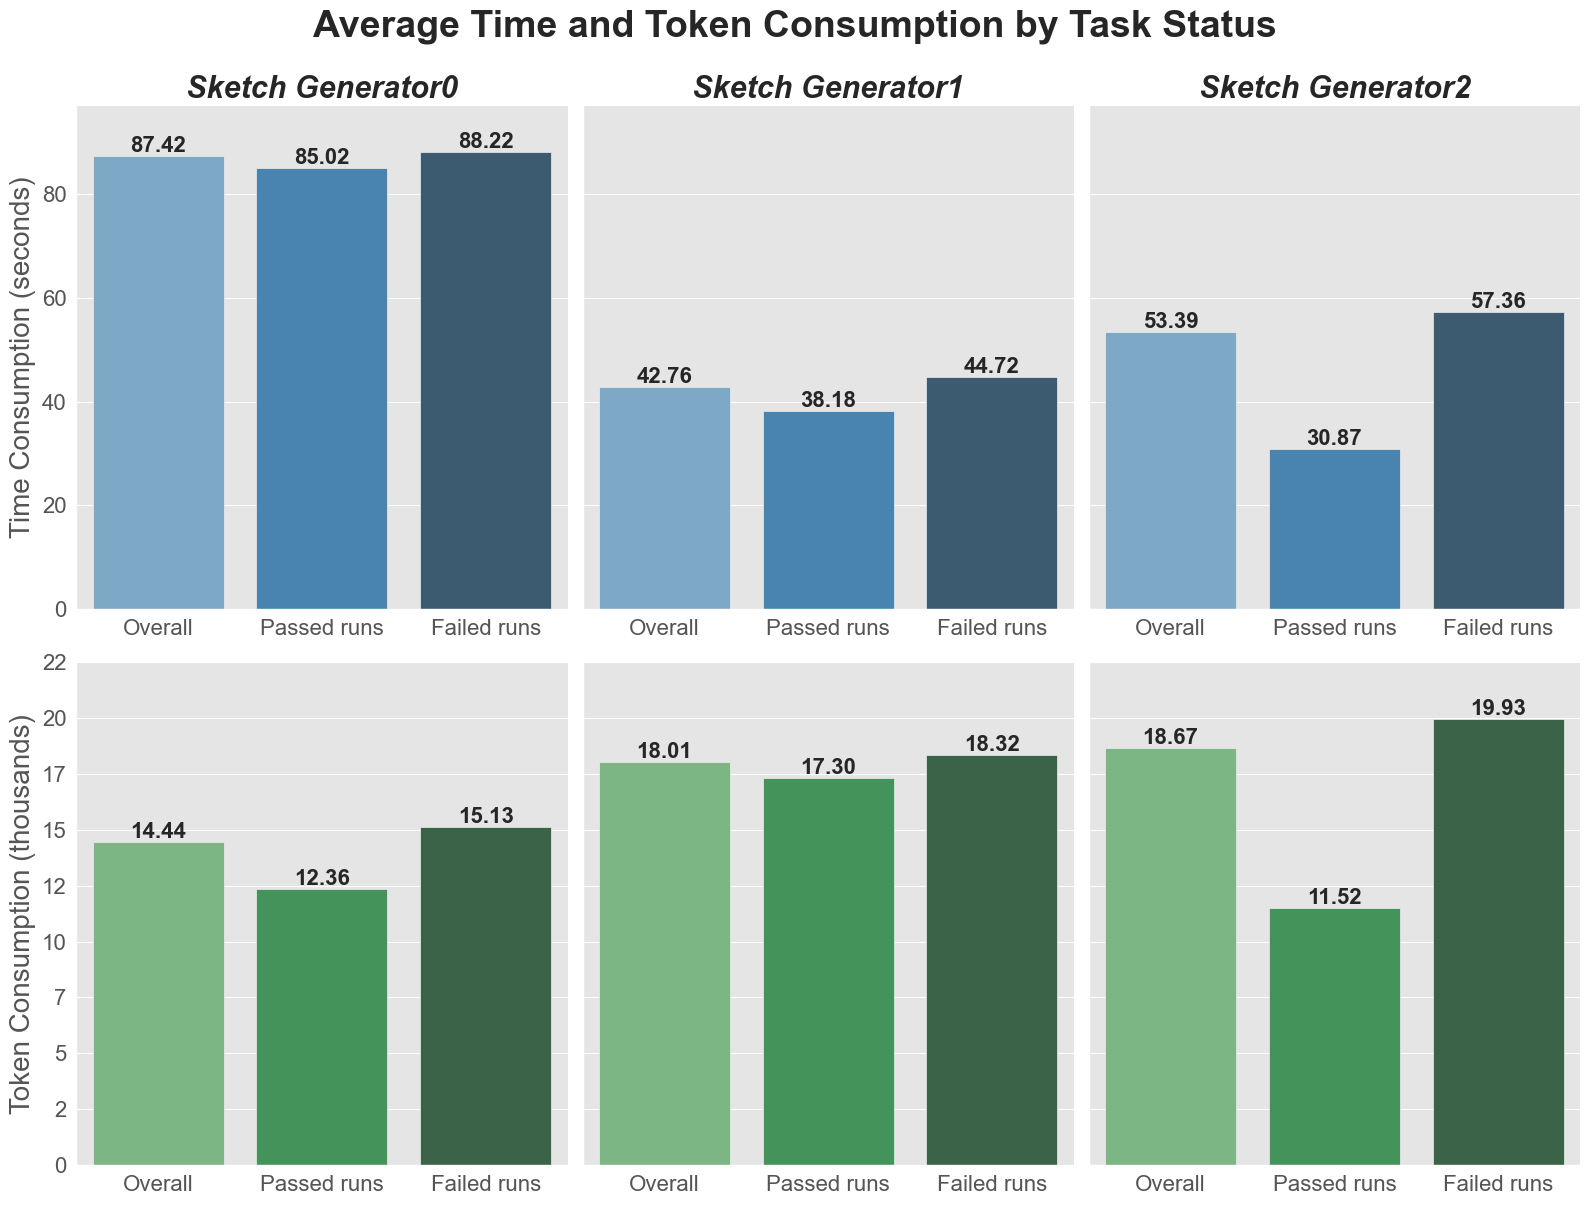

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

"""REFERENCE FROM SCATTER PLOT:
title_fontweight = 800
label_fontweight = 600
tick_fontweight = 400
legend_fontweight = "normal"
legend_fontweight2 = "normal"

title_fontsize = 24
label_fontsize = 20
tick_fontsize = 18
legend_fontsize = 16
"""

# Define plot styling variables
SUPTITLE_SIZE = 27
TITLE_SIZE = 22
TICK_LABEL_SIZE = 16
ANNOTATION_SIZE = 16  # New variable for bar value annotations
AXIS_LABEL_SIZE = 20  # New variable for axis labels
FONT_WEIGHT = "bold"

# Load all datasets
data_dir = "processed_data"
for key, info in batches.items():
    print("#"*40)
    print(f"Loading data for the key {key}..., batch_id: {info}")
    print(f"Searching for file: clean_{info['name']}_{info['batch_id']}.csv")
    
    filename = f"clean_{info['name']}_{info['batch_id']}.csv"

    if key == "SG0":
        print(f"Loading data for Sketch Generator0")
        df_sg0 = pd.read_csv(f"{data_dir}/{filename}")
        print(f"Data loaded for Sketch Generator0, shape: {df_sg0.shape}")
    elif key == "SG1":
        print(f"Loading data for Sketch Generator1")
        df_sg1 = pd.read_csv(f"{data_dir}/{filename}")
        print(f"Data loaded for Sketch Generator1, shape: {df_sg1.shape}")
    elif key == "SG2":
        print(f"Loading data for Sketch Generator2")
        df_sg2 = pd.read_csv(f"{data_dir}/{filename}")
        print(f"Data loaded for Sketch Generator2, shape: {df_sg2.shape}")


def calculate_stats(df, column):
    stats = {
        "average": df[column].mean(),
        "minimum": df[column].min(),
        "maximum": df[column].max(),
    }
    if "token" in column:
        # Handle NaN values before converting to int
        return {k: int(v) if not pd.isna(v) else 0 for k, v in stats.items()}
    return stats


def calculate_stats_by_status(df, status=None):
    if status is not None:
        subset = df[df["status"] == status]  # Changed from "pass" to "status"
    else:
        subset = df
    return {
        "total_tokens": calculate_stats(subset, "total_tokens"),
        "latency": calculate_stats(subset, "latency"),
    }


def prepare_data_for_plot(df, task_name):
    overall_stats = calculate_stats_by_status(df)
    passed_stats = calculate_stats_by_status(
        df, "success"
    )  # Changed from "yes" to "success"
    failed_stats = calculate_stats_by_status(
        df, "error"
    )  # Changed from "no" to "error"

    data = []
    for metric in ["latency", "total_tokens"]:
        for status, stats in [
            ("Overall", overall_stats),
            ("Passed runs", passed_stats),  # Changed label from "Passed" to "Success"
            ("Failed runs", failed_stats),  # Changed label from "Failed" to "Error"
        ]:
            data.append(
                {
                    "Task": task_name,
                    "Metric": metric,
                    "Status": status,
                    "Average": stats[metric]["average"],
                    "Minimum": stats[metric]["minimum"],
                    "Maximum": stats[metric]["maximum"],
                }
            )
    return pd.DataFrame(data)


# Prepare data for plotting

df_sg0 = prepare_data_for_plot(df_sg0, "Sketch Generator0")
df_sg1 = prepare_data_for_plot(df_sg1, "Sketch Generator1")
df_sg2 = prepare_data_for_plot(df_sg2, "Sketch Generator2")
# Combine all data
df_all = pd.concat([ df_sg0, df_sg1,df_sg2])

# Determine global y-axis limits
latency_max = df_all[df_all["Metric"] == "latency"]["Average"].max()
tokens_max = df_all[df_all["Metric"] == "total_tokens"]["Average"].max()

# ... (keep the data loading and preparation code unchanged)

# Set the style
plt.style.use("ggplot")
sns.set_palette("muted")

# Plotting
tasks = df_all["Task"].unique()
fig, axes = plt.subplots(nrows=2, ncols=len(tasks), figsize=(16, 12), sharey="row")
plt.subplots_adjust(top=0.85)  # Add more space at the top


for col, task in enumerate(tasks):
    task_data = df_all[df_all["Task"] == task]

    # Plot latency
    ax_latency = axes[0, col]
    latency_data = task_data[task_data["Metric"] == "latency"]
    sns.barplot(
        x="Status",
        y="Average",
        data=latency_data,
        ax=ax_latency,
        hue="Status",
        palette="Blues_d",
        legend=False,
    )
    ax_latency.set_ylabel(
        "Time Consumption (seconds)" if col == 0 else "", fontsize=AXIS_LABEL_SIZE
    )
    ax_latency.set_ylim(0, latency_max * 1.1)
    ax_latency.set_title(
        task, fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT, style="italic"
    )

    # Annotate latency bars
    for i, bar in enumerate(ax_latency.patches):
        yval = bar.get_height()
        ax_latency.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"{yval:.2f}",
            ha="center",
            va="bottom",
            fontweight=FONT_WEIGHT,
            fontsize=ANNOTATION_SIZE,
        )

    # Plot total tokens
    ax_tokens = axes[1, col]
    tokens_data = task_data[task_data["Metric"] == "total_tokens"]
    sns.barplot(
        x="Status",
        y="Average",
        data=tokens_data,
        ax=ax_tokens,
        hue="Status",
        palette="Greens_d",
        legend=False,
    )
    ax_tokens.set_ylabel(
        "Token Consumption (thousands)" if col == 0 else "", fontsize=AXIS_LABEL_SIZE
    )
    ax_tokens.set_ylim(0, tokens_max * 1.1)

    # Set y-axis ticks manually
    y_ticks = ax_tokens.get_yticks()
    ax_tokens.set_yticks(y_ticks)
    ax_tokens.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])

    # Annotate token bars
    for i, bar in enumerate(ax_tokens.patches):
        yval = bar.get_height()
        ax_tokens.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"{yval/1000:.2f}",
            ha="center",
            va="bottom",
            fontweight=FONT_WEIGHT,
            fontsize=ANNOTATION_SIZE,
        )

    # Improve readability
    for ax in [ax_latency, ax_tokens]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(axis="both", which="major", labelsize=TICK_LABEL_SIZE)
        ax.set_xlabel("")

# Add overall title
fig.suptitle(
    "Average Time and Token Consumption by Task Status",
    fontsize=SUPTITLE_SIZE,
    fontweight=FONT_WEIGHT,
    y=1,
)
plt.tight_layout()

plt.savefig(f"{save_dir}bar_plot.pdf", format="pdf", dpi=400, bbox_inches="tight")
# Adjust layout

plt.show()

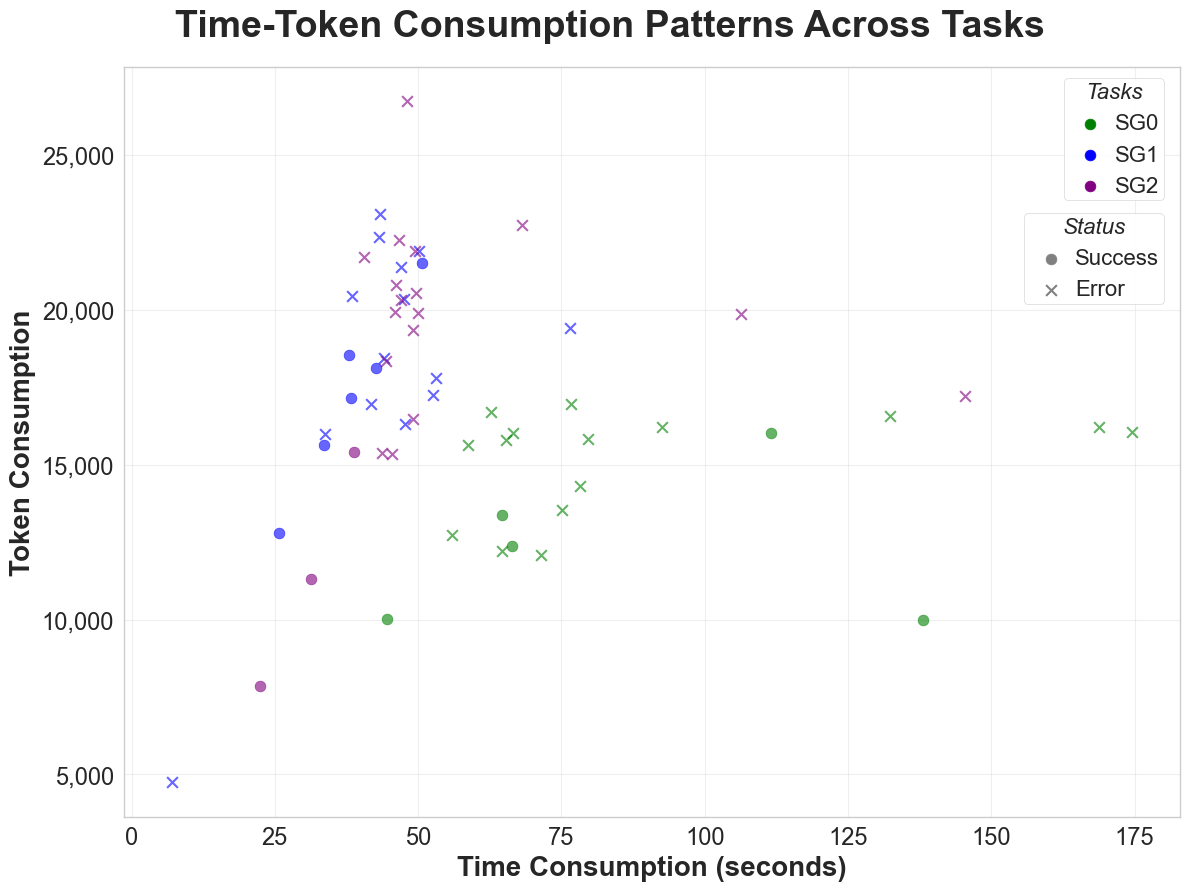

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker

# Style parameters
title_fontweight = 800
label_fontweight = 600
tick_fontweight = 400
legend_fontweight = "normal"
legend_fontweight2 = "normal"

title_fontsize = 27
label_fontsize = 20
tick_fontsize = 18
legend_fontsize = 16

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


# Load and combine data
data_dir = "processed_data"
dataframes = []

for task_name, batch_info in batches.items():
    input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
    df = pd.read_csv(f"{data_dir}/{input_csv}")
    df["task"] = task_name
    dataframes.append(df)

df_combined = pd.concat(dataframes)

# Set the style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 9))

# Define colors for each task
task_colors = {
    # "Model Conversion": "blue",
    # "Data Processing": "green",
    # "Sketch Generation": "purple",
    "SG0": "green",
    "SG1": "blue",
    "SG2": "purple",
}

# Plot each task with different colors and markers
for task, color in task_colors.items():
    task_data = df_combined[df_combined["task"] == task]

    # Plot successful runs
    success = task_data[task_data["status"] == "success"]
    plt.scatter(
        success["latency"],
        success["total_tokens"],
        color=color,
        alpha=0.6,
        label=task,
        marker="o",
        s=60,
    )

    # Plot failed runs
    failed = task_data[task_data["status"] == "error"]
    plt.scatter(
        failed["latency"],
        failed["total_tokens"],
        color=color,
        alpha=0.6,
        marker="x",
        s=60,
    )

# Labels and title
plt.xlabel(
    "Time Consumption (seconds)", fontsize=label_fontsize, fontweight=label_fontweight
)
plt.ylabel("Token Consumption", fontsize=label_fontsize, fontweight=label_fontweight)
plt.title(
    "Time-Token Consumption Patterns Across Tasks",
    fontsize=title_fontsize,
    loc="center",
    x=0.46,
    y=1.03,
    fontweight=title_fontweight,
)
plt.tick_params(axis="both", which="major", labelsize=17)

# Format axis numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f"{int(y):,}"))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Create legend handles
task_handles = []
task_labels = []
status_handles = []
status_labels = []

# Collect task handles and labels
for task, color in task_colors.items():
    task_handles.append(plt.scatter([], [], color=color, marker="o", s=60))
    task_labels.append(task)

# Add status handles and labels
status_handles.append(plt.scatter([], [], color="gray", marker="o", s=60))
status_handles.append(plt.scatter([], [], color="gray", marker="x", s=60))
status_labels.extend(["Success", "Error"])

legend_title_prop = {
    "weight": legend_fontweight,
    "size": legend_fontsize,
    "style": "italic",
}

# Create legends
first_legend = plt.legend(
    task_handles,
    task_labels,
    loc="upper right",
    bbox_to_anchor=(0.995, 1.0),
    prop={"weight": legend_fontweight, "size": legend_fontsize},
    frameon=True,
    scatterpoints=1,
    markerscale=1,
    markerfirst=True,
    handletextpad=0.1,
    borderpad=0.2,
    edgecolor="lightgray",
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    title="Tasks",
    title_fontproperties=legend_title_prop,
)

# Add the second legend for status markers
plt.gca().add_artist(first_legend)
plt.legend(
    status_handles,
    status_labels,
    loc="upper right",
    bbox_to_anchor=(0.995, 0.82),
    prop={"weight": legend_fontweight, "size": legend_fontsize},
    frameon=True,
    scatterpoints=1,
    markerscale=1,
    markerfirst=True,
    handletextpad=0.1,
    borderpad=0.2,
    edgecolor="lightgray",
    fancybox=True,
    shadow=False,
    framealpha=0.9,
    title="Status",
    title_fontproperties=legend_title_prop,
)

# Finishing touches
plt.grid(True, linestyle="-", alpha=0.3)
plt.tight_layout()
plt.savefig(f"{save_dir}scatter_plot.pdf", format="pdf", dpi=400)
plt.show()

## Calculating Mean Absolute Deviation (MAD)

Mean Absolute Deviation measures the average distance between each data point and the mean. It gives us a sense of variability in the data.


In [93]:
import pandas as pd
import numpy as np

def calculate_mad(values):
    """Calculate Mean Absolute Deviation of a series of values"""
    mean = np.mean(values)
    mad = np.mean(np.abs(values - mean))
    return mad

def calculate_stats_with_mad(df, column):
    """Calculate statistics including MAD for a given column"""
    return {
        "average": df[column].mean(),
        "minimum": df[column].min(),
        "maximum": df[column].max(),
        "mad": calculate_mad(df[column].values)
    }

def calculate_stats_by_status_with_mad(df, status=None):
    if status is not None:
        subset = df[df["status"] == status]
    else:
        subset = df

    print(f"\nCalculating stats for status: {status}")
    print(f"Subset size: {len(subset)}")
    if subset.empty:
        print("Subset is empty. Returning zeros.")
        return {
            "total_tokens": {"average": 0, "minimum": 0, "maximum": 0, "mad": 0},
            "latency": {"average": 0, "minimum": 0, "maximum": 0, "mad": 0},
        }

    total_tokens_stats = calculate_stats_with_mad(subset, "total_tokens")
    latency_stats = calculate_stats_with_mad(subset, "latency")
    print(f"Total Tokens Stats: {total_tokens_stats}")
    print(f"Latency Stats: {latency_stats}")

    return {
        "total_tokens": total_tokens_stats,
        "latency": latency_stats,
    }

In [94]:


# Calculate MAD for all datasets
def calculate_mad_stats(batches, data_dir="processed_data"):
    # Create a dictionary to store results
    mad_results = {}
    
    print("\n=== Mean Absolute Deviation (MAD) Analysis ===\n")
    print("{:<20} {:<15} {:<15} {:<15} {:<15}".format(
        "Dataset", "Metric", "Overall MAD", "Success MAD", "Error MAD"
    ))
    print("-" * 80)
    
    # Process each batch
    for task_name, batch_info in batches.items():
        input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
        df = pd.read_csv(f"{data_dir}/{input_csv}")
        
        # Calculate stats for overall, success, and error
        overall_stats = calculate_stats_by_status_with_mad(df)
        success_stats = calculate_stats_by_status_with_mad(df, "success")
        error_stats = calculate_stats_by_status_with_mad(df, "error")
        
        # Store results
        mad_results[task_name] = {
            "overall": overall_stats,
            "success": success_stats,
            "error": error_stats
        }
        
        # Print MAD for tokens
        print("{:<20} {:<15} {:<15.2f} {:<15.2f} {:<15.2f}".format(
            task_name,
            "Tokens",
            overall_stats["total_tokens"]["mad"],
            success_stats["total_tokens"]["mad"],
            error_stats["total_tokens"]["mad"]
        ))
        
        # Print MAD for latency
        print("{:<20} {:<15} {:<15.2f} {:<15.2f} {:<15.2f}".format(
            task_name,
            "Time (s)",
            overall_stats["latency"]["mad"],
            success_stats["latency"]["mad"],
            error_stats["latency"]["mad"]
        ))
        print("-" * 80)
    
    return mad_results

# Run the MAD analysis
mad_results = calculate_mad_stats(batches)



=== Mean Absolute Deviation (MAD) Analysis ===

Dataset              Metric          Overall MAD     Success MAD     Error MAD      
--------------------------------------------------------------------------------

Calculating stats for status: None
Subset size: 20
Total Tokens Stats: {'average': 14435.25, 'minimum': 9991, 'maximum': 16953, 'mad': 1926.225}
Latency Stats: {'average': 87.4197086, 'minimum': 44.496467, 'maximum': 174.54858800000002, 'mad': 29.335360540000003}

Calculating stats for status: success
Subset size: 5
Total Tokens Stats: {'average': 12356.0, 'minimum': 9991, 'maximum': 16018, 'mad': 1881.2}
Latency Stats: {'average': 85.02488559999999, 'minimum': 44.496467, 'maximum': 138.10807599999998, 'mad': 31.830571919999993}

Calculating stats for status: error
Subset size: 15
Total Tokens Stats: {'average': 15128.333333333334, 'minimum': 12087, 'maximum': 16953, 'mad': 1433.1555555555553}
Latency Stats: {'average': 88.21798293333333, 'minimum': 55.985569, 'maximum': 17

## Visualizing Mean Absolute Deviation

Below are bar charts showing the Mean Absolute Deviation for token usage and time consumption across different datasets and run statuses.


Preparing MAD data for plotting...
  Adding Time (seconds) MAD values for SG0
  Adding Time (seconds) MAD values for SG1
  Adding Time (seconds) MAD values for SG2
MAD data preparation complete.
Plotting Time Consumption MAD...
Plot saved to tex/mad_visualization.pdf


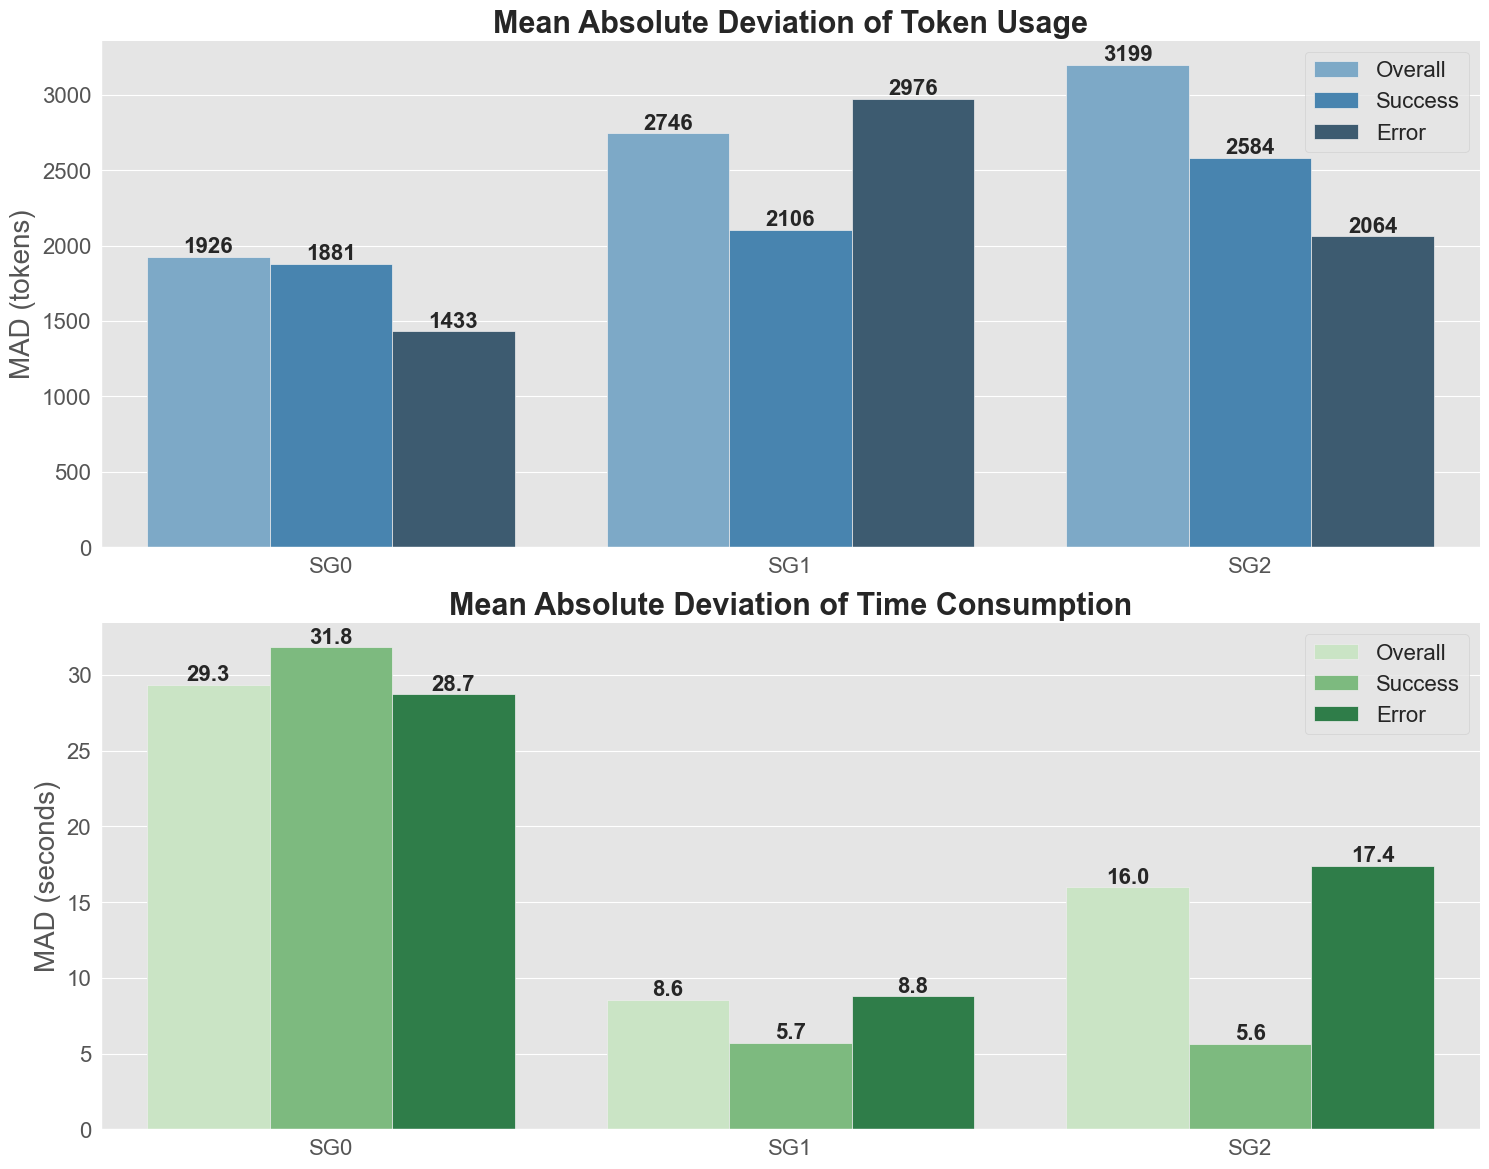

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the same styling variables from previous plotting
SUPTITLE_SIZE = 27
TITLE_SIZE = 22
TICK_LABEL_SIZE = 16
ANNOTATION_SIZE = 16
AXIS_LABEL_SIZE = 20
FONT_WEIGHT = "bold"

# Convert MAD results to a DataFrame for easier plotting
def prepare_mad_data_for_plotting(mad_results):
    print("Preparing MAD data for plotting...")
    data = []
    for dataset, stats in mad_results.items():

        
        # Add tokens MAD values

        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Overall',
            'MAD': stats['overall']['total_tokens']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Success',
            'MAD': stats['success']['total_tokens']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Error',
            'MAD': stats['error']['total_tokens']['mad']
        })
        
        # Add latency MAD values
        print(f"  Adding Time (seconds) MAD values for {dataset}")
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Overall',
            'MAD': stats['overall']['latency']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Success',
            'MAD': stats['success']['latency']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Error',
            'MAD': stats['error']['latency']['mad']
        })
    print("MAD data preparation complete.")
    return pd.DataFrame(data)

# Prepare data for plotting
mad_df = prepare_mad_data_for_plotting(mad_results)
# Debugging: Inspect the mad_df DataFrame for SG0 and Token Usage


# Set style
plt.style.use('ggplot')
sns.set_palette('muted')

# Create figure for plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))


# Plot token MAD

token_data = mad_df[mad_df['Metric'] == 'Token Usage']


sns.barplot(
    data=token_data,
    x='Dataset',
    y='MAD',
    hue='Status',
    palette='Blues_d',
    ax=axes[0],
    
)
axes[0].set_title('Mean Absolute Deviation of Token Usage', 
                 fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT)
axes[0].set_ylabel('MAD (tokens)', fontsize=AXIS_LABEL_SIZE)
axes[0].set_xlabel('', fontsize=AXIS_LABEL_SIZE)

# Annotate token bars
for p in axes[0].patches:
    if p.get_height() > 0:
  
        axes[0].annotate(f'{p.get_height():.0f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom',
                        fontsize=ANNOTATION_SIZE, fontweight=FONT_WEIGHT)

# Plot time MAD
print("Plotting Time Consumption MAD...")
time_data = mad_df[mad_df['Metric'] == 'Time (seconds)']
sns.barplot(
    data=time_data,
    x='Dataset',
    y='MAD',
    hue='Status',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Mean Absolute Deviation of Time Consumption', 
                 fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT)
axes[1].set_ylabel('MAD (seconds)', fontsize=AXIS_LABEL_SIZE)

# Annotate time bars
for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(f'{p.get_height():.1f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom',
                        fontsize=ANNOTATION_SIZE, fontweight=FONT_WEIGHT)

# Improve readability
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
    ax.legend(fontsize=TICK_LABEL_SIZE)

plt.tight_layout()
plt.xlabel('', fontsize=AXIS_LABEL_SIZE)
plt.savefig(f'{save_dir}mad_visualization.pdf', format='pdf', dpi=400, bbox_inches='tight')
print(f"Plot saved to {save_dir}mad_visualization.pdf")

plt.show()

Creating plots...
Plotting Token Usage MAD...
Token Data for Plotting:
   Dataset       Metric   Status          MAD
0      SG0  Token Usage  Overall  1926.225000
1      SG0  Token Usage  Success  1881.200000
2      SG0  Token Usage    Error  1433.155556
6      SG1  Token Usage  Overall  2745.800000
7      SG1  Token Usage  Success  2106.166667
8      SG1  Token Usage    Error  2976.183673
12     SG2  Token Usage  Overall  3199.200000
13     SG2  Token Usage  Success  2584.000000
14     SG2  Token Usage    Error  2063.716263
Plotting Time Consumption MAD...


/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_63450/2043851322.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_63450/2043851322.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_63450/2043851322.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/fk/pd_cb7_x7k3bl94y8nq4shgw0000gn/T/ipykernel_63450/2043851322.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

Plot saved to tex/mad_visualization.pdf


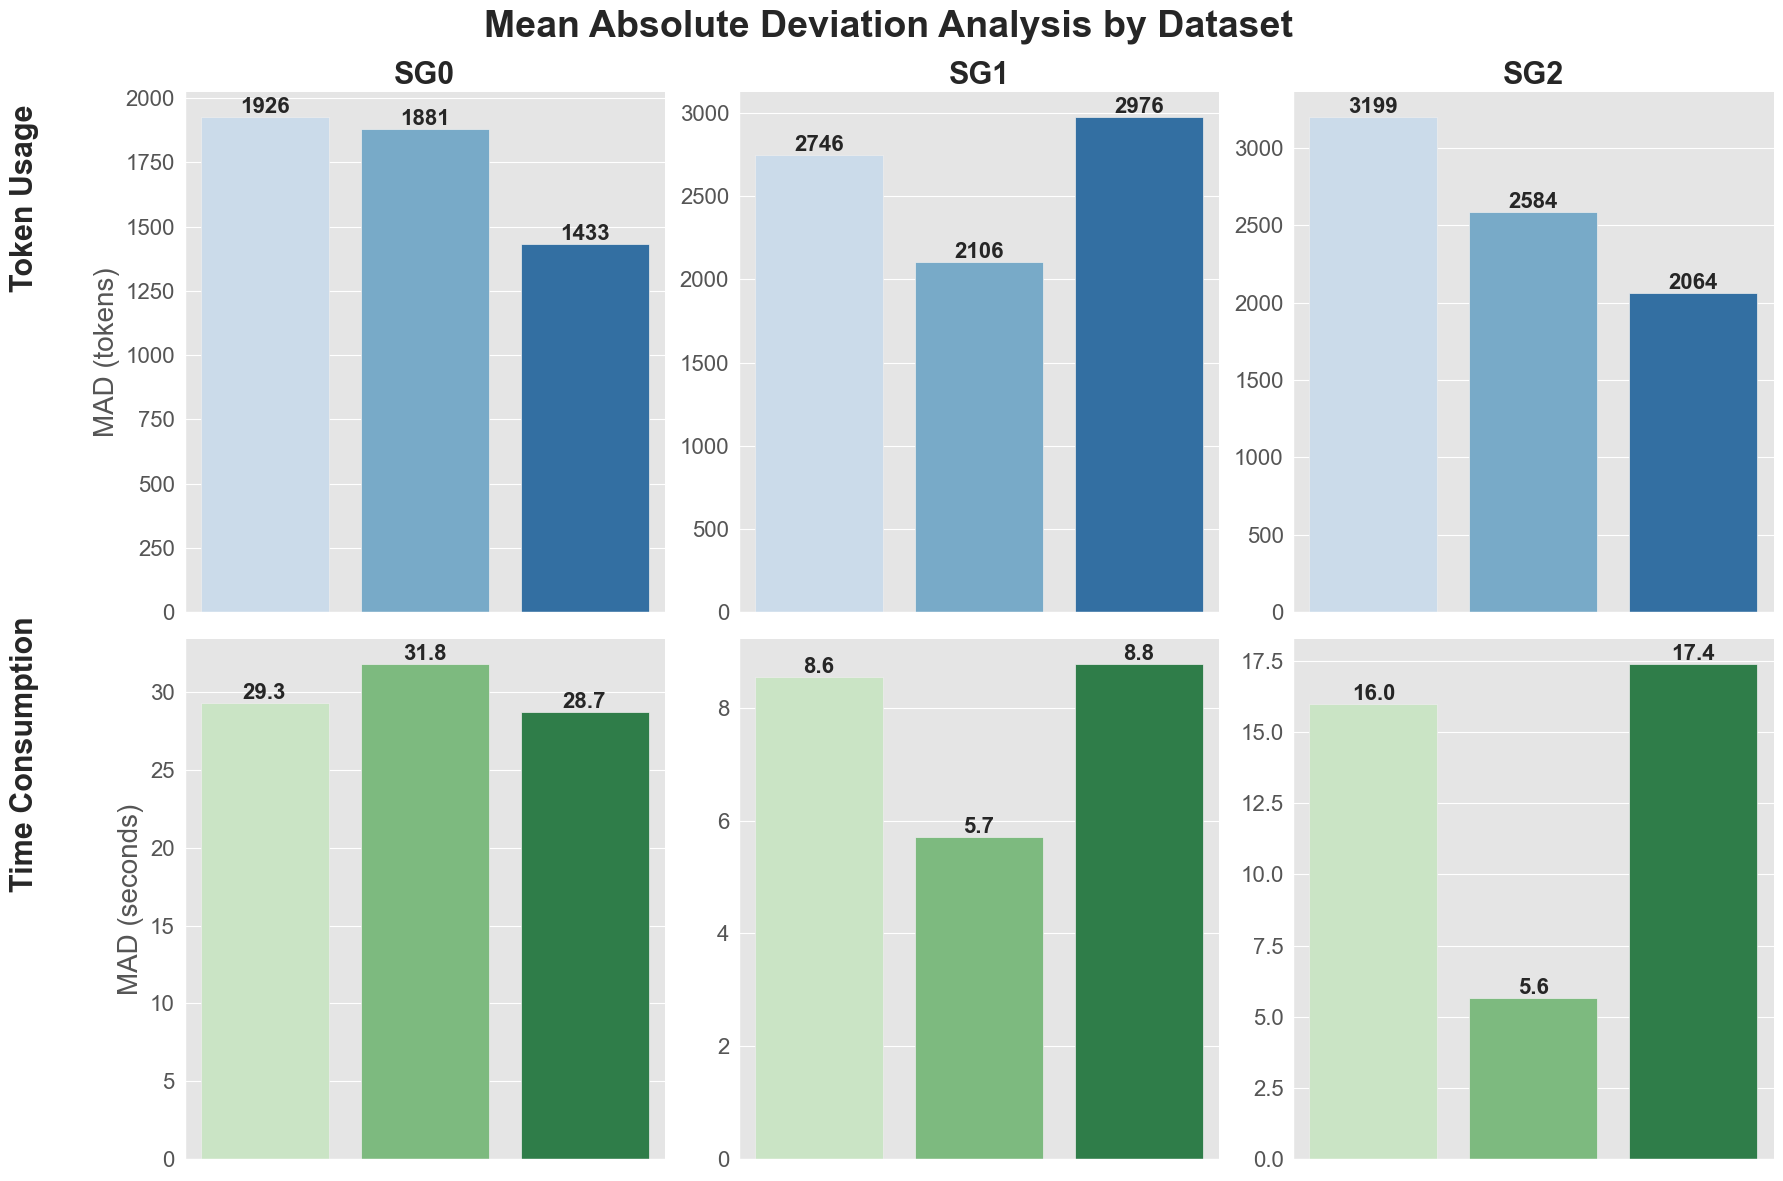

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the same styling variables from previous plotting
SUPTITLE_SIZE = 27
TITLE_SIZE = 22
TICK_LABEL_SIZE = 16
ANNOTATION_SIZE = 16
AXIS_LABEL_SIZE = 20
FONT_WEIGHT = "bold"

# Get unique datasets for creating subplots
datasets = mad_df['Dataset'].unique()
n_datasets = len(datasets)

# Set style
plt.style.use('ggplot')
sns.set_palette('muted')

# Create figure with separate subplots for each dataset
fig, axes = plt.subplots(2, n_datasets, figsize=(6*n_datasets, 12))
print("Creating plots...")

# Plot token MAD (top row)
print("Plotting Token Usage MAD...")
token_data = mad_df[mad_df['Metric'] == 'Token Usage']
print("Token Data for Plotting:")
print(token_data)

# Plot time MAD (bottom row)
print("Plotting Time Consumption MAD...")
time_data = mad_df[mad_df['Metric'] == 'Time (seconds)']

# Process each dataset
for i, dataset in enumerate(datasets):
    # Filter data for this dataset
    dataset_token_data = token_data[token_data['Dataset'] == dataset]
    dataset_time_data = time_data[time_data['Dataset'] == dataset]
    
    # Plot token MAD for this dataset
    sns.barplot(
        data=dataset_token_data,
        x='Status',
        y='MAD',
        palette='Blues',
        ax=axes[0, i]
    )
    axes[0, i].set_title(dataset, fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT)
    
    if i == 0:  # Only add y-label for the first subplot in each row
        axes[0, i].set_ylabel('MAD (tokens)', fontsize=AXIS_LABEL_SIZE)
    else:
        axes[0, i].set_ylabel('')
    
    # Remove x-axis labels and title
    axes[0, i].set_xticklabels([])
    axes[0, i].set_xlabel('')
    
    # Annotate token bars
    for p in axes[0, i].patches:
        if p.get_height() > 0:
            axes[0, i].annotate(f'{p.get_height():.0f}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom',
                            fontsize=ANNOTATION_SIZE, fontweight=FONT_WEIGHT)
    
    # Plot time MAD for this dataset
    sns.barplot(
        data=dataset_time_data,
        x='Status',
        y='MAD',
        palette='Greens',
        ax=axes[1, i]
    )
    
    if i == 0:  # Only add y-label for the first subplot in each row
        axes[1, i].set_ylabel('MAD (seconds)', fontsize=AXIS_LABEL_SIZE)
    else:
        axes[1, i].set_ylabel('')
    
    # Remove x-axis labels and title
    axes[1, i].set_xticklabels([])
    axes[1, i].set_xlabel('')
    
    # Annotate time bars
    for p in axes[1, i].patches:
        if p.get_height() > 0:
            axes[1, i].annotate(f'{p.get_height():.1f}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom',
                            fontsize=ANNOTATION_SIZE, fontweight=FONT_WEIGHT)
    
    # Improve readability for both subplots
    for row in range(2):
        axes[row, i].spines['top'].set_visible(False)
        axes[row, i].spines['right'].set_visible(False)
        axes[row, i].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)

# Add row titles at the left side
fig.text(0.02, 0.75, 'Token Usage', fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT, rotation=90, ha='center')
fig.text(0.02, 0.25, 'Time Consumption', fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT, rotation=90, ha='center')

plt.tight_layout(rect=[0.05, 0, 1, 0.95])
plt.suptitle('Mean Absolute Deviation Analysis by Dataset', fontsize=SUPTITLE_SIZE, fontweight=FONT_WEIGHT, y=0.98)
plt.savefig(f'{save_dir}mad_visualization.pdf', format='pdf', dpi=400, bbox_inches='tight')
print(f"Plot saved to {save_dir}mad_visualization.pdf")

plt.show()

In [96]:
def prepare_mad_data_for_plotting(mad_results):
    print("Preparing MAD data for plotting...")
    data = []
    for dataset, stats in mad_results.items():
        print(f"Processing dataset: {dataset}")
        
        # Add tokens MAD values
        print(f"  Adding Token Usage MAD values for {dataset}")
        print(f"    Overall MAD: {stats['overall']['total_tokens']['mad']}")
        print(f"    Success MAD: {stats['success']['total_tokens']['mad']}")
        print(f"    Error MAD: {stats['error']['total_tokens']['mad']}")

        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Overall',
            'MAD': stats['overall']['total_tokens']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Success',
            'MAD': stats['success']['total_tokens']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Token Usage',
            'Status': 'Error',
            'MAD': stats['error']['total_tokens']['mad']
        })
        
        # Add latency MAD values
        print(f"  Adding Time (seconds) MAD values for {dataset}")
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Overall',
            'MAD': stats['overall']['latency']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Success',
            'MAD': stats['success']['latency']['mad']
        })
        data.append({
            'Dataset': dataset,
            'Metric': 'Time (seconds)',
            'Status': 'Error',
            'MAD': stats['error']['latency']['mad']
        })
    print("MAD data preparation complete.")
    return pd.DataFrame(data)

# Add this after calling prepare_mad_data_for_plotting
mad_df = prepare_mad_data_for_plotting(mad_results)
print("MAD DataFrame:")
print(mad_df)

Preparing MAD data for plotting...
Processing dataset: SG0
  Adding Token Usage MAD values for SG0
    Overall MAD: 1926.225
    Success MAD: 1881.2
    Error MAD: 1433.1555555555553
  Adding Time (seconds) MAD values for SG0
Processing dataset: SG1
  Adding Token Usage MAD values for SG1
    Overall MAD: 2745.8
    Success MAD: 2106.1666666666665
    Error MAD: 2976.183673469387
  Adding Time (seconds) MAD values for SG1
Processing dataset: SG2
  Adding Token Usage MAD values for SG2
    Overall MAD: 3199.2
    Success MAD: 2584.0
    Error MAD: 2063.7162629757786
  Adding Time (seconds) MAD values for SG2
MAD data preparation complete.
MAD DataFrame:
   Dataset          Metric   Status          MAD
0      SG0     Token Usage  Overall  1926.225000
1      SG0     Token Usage  Success  1881.200000
2      SG0     Token Usage    Error  1433.155556
3      SG0  Time (seconds)  Overall    29.335361
4      SG0  Time (seconds)  Success    31.830572
5      SG0  Time (seconds)    Error    28.716

## Detailed Statistical Comparison: MAD vs. Standard Deviation

Mean Absolute Deviation (MAD) and Standard Deviation are both measures of dispersion. MAD is more robust to outliers than standard deviation. Comparing them can give insights into the distribution of our data.


In [97]:
def calculate_comparative_stats(batches, data_dir="processed_data"):
    print("\n=== Comparative Analysis: MAD vs. Standard Deviation ===\n")
    print("{:<20} {:<15} {:<15} {:<15} {:<15} {:<15}".format(
        "Dataset", "Metric", "Status", "Mean", "MAD", "Std Dev"
    ))
    print("-" * 85)
    
    results = []
    
    # Process each batch
    for task_name, batch_info in batches.items():
        input_csv = f"clean_{batch_info['name']}_{batch_info['batch_id']}.csv"
        df = pd.read_csv(f"{data_dir}/{input_csv}")
        
        # Calculate for different statuses and metrics
        for status, status_label in [(None, "Overall"), ("success", "Success"), ("error", "Error")]:
            if status is not None:
                subset = df[df["status"] == status]
                if subset.empty:
                    continue
            else:
                subset = df
            
            # Calculate for tokens
            token_mean = subset["total_tokens"].mean()
            token_mad = calculate_mad(subset["total_tokens"].values)
            token_std = subset["total_tokens"].std()
            
            print("{:<20} {:<15} {:<15} {:<15.2f} {:<15.2f} {:<15.2f}".format(
                task_name, "Tokens", status_label, token_mean, token_mad, token_std
            ))
            
            results.append({
                "Dataset": task_name,
                "Metric": "Tokens",
                "Status": status_label,
                "Mean": token_mean,
                "MAD": token_mad,
                "StdDev": token_std,
                "MAD/Mean": token_mad / token_mean if token_mean != 0 else 0,
                "StdDev/Mean": token_std / token_mean if token_mean != 0 else 0
            })
            
            # Calculate for latency
            latency_mean = subset["latency"].mean()
            latency_mad = calculate_mad(subset["latency"].values)
            latency_std = subset["latency"].std()
            
            print("{:<20} {:<15} {:<15} {:<15.2f} {:<15.2f} {:<15.2f}".format(
                task_name, "Time (s)", status_label, latency_mean, latency_mad, latency_std
            ))
            
            results.append({
                "Dataset": task_name,
                "Metric": "Time",
                "Status": status_label,
                "Mean": latency_mean,
                "MAD": latency_mad,
                "StdDev": latency_std,
                "MAD/Mean": latency_mad / latency_mean if latency_mean != 0 else 0,
                "StdDev/Mean": latency_std / latency_mean if latency_mean != 0 else 0
            })
            
        print("-" * 85)
    
    return pd.DataFrame(results)

# Calculate comparative statistics
comp_stats_df = calculate_comparative_stats(batches)

# Show normalized MAD and StdDev (as percentage of mean)
print("\n=== Normalized Variability (as % of mean) ===\n")

# Build mapping from dataset names to abbreviations
batch_keys = list(batches.keys())
abbr_map = {k: f"SG{i}" for i, k in enumerate(batch_keys)}
mad_abbr = {k: f"MAD{i}" for i, k in enumerate(batch_keys)}
sd_abbr = {k: f"SD{i}" for i, k in enumerate(batch_keys)}

for metric in ["Tokens", "Time"]:
    subset = comp_stats_df[comp_stats_df["Metric"] == metric]
    display_df = subset.pivot(index="Status", columns="Dataset", values=["MAD/Mean", "StdDev/Mean"]) * 100
    # Flatten columns and build abbreviation mapping
    col_abbrs = []
    for stat, ds in display_df.columns:
        if stat == "MAD/Mean":
            col_abbrs.append(mad_abbr[ds])
        else:
            col_abbrs.append(sd_abbr[ds])
    display_df.columns = col_abbrs
    # Order columns: MAD0, MAD1, MAD2, SD0, SD1, SD2
    ordered_cols = [mad_abbr[k] for k in batch_keys] + [sd_abbr[k] for k in batch_keys]
    display_df = display_df[[c for c in ordered_cols if c in display_df.columns]]
    print(f"\n{metric}:")
    print(tabulate(display_df.round(2), headers="keys", tablefmt="pretty"))
    print()

print("Abbreviations:")
for i, k in enumerate(batch_keys):
    print(f"  MAD{i}: MAD/Mean (%) for {abbr_map[k]}")
for i, k in enumerate(batch_keys):
    print(f"  SD{i}: StdDev/Mean (%) for {abbr_map[k]}")


=== Comparative Analysis: MAD vs. Standard Deviation ===

Dataset              Metric          Status          Mean            MAD             Std Dev        
-------------------------------------------------------------------------------------
SG0                  Tokens          Overall         14435.25        1926.22         2227.21        
SG0                  Time (s)        Overall         87.42           29.34           37.53          
SG0                  Tokens          Success         12356.00        1881.20         2526.30        
SG0                  Time (s)        Success         85.02           31.83           38.49          
SG0                  Tokens          Error           15128.33        1433.16         1688.15        
SG0                  Time (s)        Error           88.22           28.72           38.54          
-------------------------------------------------------------------------------------
SG1                  Tokens          Overall         18014.00 

## Summary of Mean Absolute Deviation (MAD) Analysis

This analysis provides insights into the variability of token usage and time consumption across different sketch generator implementations.


### Key Findings from MAD Analysis

#### Token Usage Variability

1. **Overall MAD Pattern**: Sketch Generator2 shows the highest variability in token usage (MAD = 3199), followed by Sketch Generator1 (MAD = 2746) and Sketch Generator0 (MAD = 1926).

2. **Success vs Error**:

   - For Sketch Generator0, error cases show less variability (MAD = 1433) than successful runs (MAD = 1881).
   - For Sketch Generator1, error cases show more variability (MAD = 2976) than successful runs (MAD = 2106).
   - For Sketch Generator2, successful runs show more variability (MAD = 2584) than error cases (MAD = 2064).

3. **Relative Variability**: When normalized as a percentage of mean (MAD/Mean):
   - Success runs in Sketch Generator2 show the highest relative variability at 22.43%.
   - Error cases in Sketch Generator1 show high relative variability at 16.25%.

#### Time Consumption Variability

1. **Overall Time MAD**: Sketch Generator0 shows significantly higher time variability (MAD = 29.3s) compared to Sketch Generator2 (MAD = 16.0s) and Sketch Generator1 (MAD = 8.6s).

2. **Success vs Error**:

   - For all generators, successful runs show different variability patterns than error cases.
   - Sketch Generator1 shows the most consistent performance in successful runs (MAD = 5.7s).

3. **Relative Time Variability**: When normalized as a percentage of mean (MAD/Mean):
   - Sketch Generator0 shows the highest relative variability in both successful runs (37.44%) and overall (33.56%).
   - Sketch Generator1 shows the lowest relative variability for successful runs (14.95%).

### MAD vs Standard Deviation

The comparison between MAD and standard deviation reveals:

1. Standard deviation is consistently higher than MAD across all metrics, which is expected since standard deviation gives more weight to outliers.

2. The gap between MAD and standard deviation is largest for Sketch Generator1's error cases in token consumption (StdDev/Mean = 24.79% vs MAD/Mean = 16.25%), suggesting this dataset contains more outliers.

3. For time consumption, the difference between MAD and standard deviation is particularly large for Sketch Generator0 and Sketch Generator2, indicating more extreme values in time measurements.

### Implications

1. **Performance Consistency**: Sketch Generator1 provides the most consistent time performance for successful runs, which could be valuable for applications with strict latency requirements.

2. **Token Efficiency**: Sketch Generator0 shows the most consistent token usage, which may be beneficial for cost optimization.

3. **Success vs Failure**: The different variability patterns between success and error cases suggest that understanding failure modes is important for improving overall consistency.


### Recommendations

1. **For Latency-Critical Applications**: Consider using Sketch Generator1 as it shows the lowest and most consistent time consumption for successful runs.

2. **For Token/Cost-Critical Applications**: Sketch Generator0 shows the lowest token usage and relatively consistent consumption patterns.

3. **For Further Research**:
   - Investigate why Sketch Generator2 has such high token variability for successful runs.
   - Explore the cause of high time variability in Sketch Generator0.
   - Analyze the outliers in Sketch Generator1's error cases to understand what's causing the wide distribution.


## Visualizing Relative Variability (MAD/Mean Ratio)

To better compare the variability across datasets with different scales, we'll visualize the MAD as a percentage of the mean (sometimes called the coefficient of variation based on MAD).


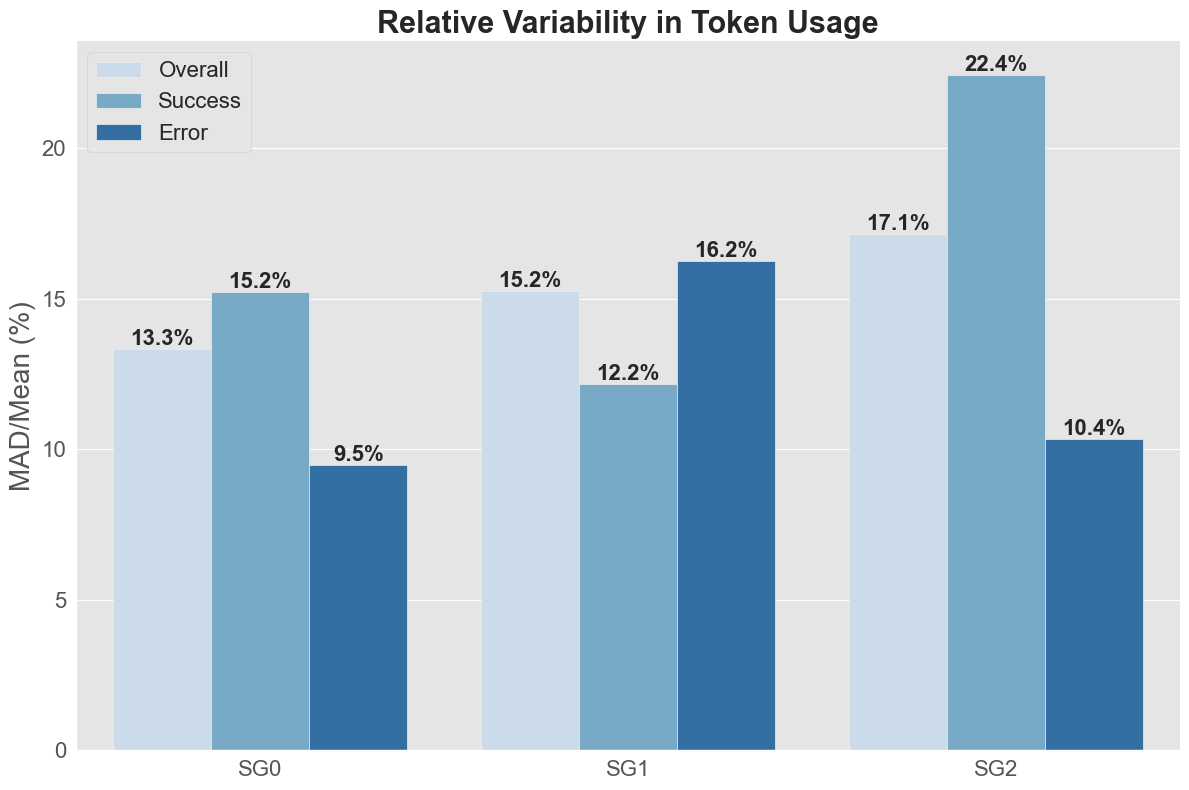

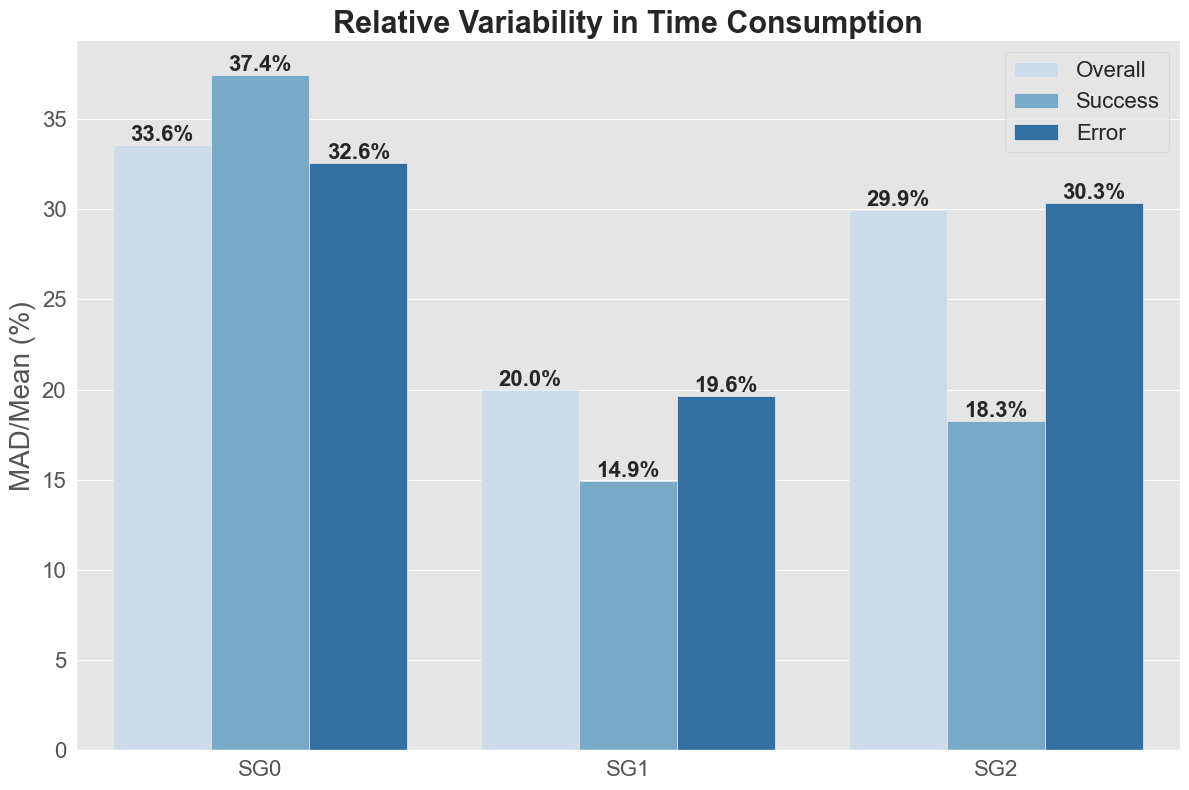

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a DataFrame with normalized MAD values (MAD/Mean ratio)
def prepare_normalized_mad_data(comp_stats_df):
    # Filter data and calculate normalized values
    normalized_data = []
    
    for index, row in comp_stats_df.iterrows():
        normalized_data.append({
            'Dataset': row['Dataset'],
            'Metric': row['Metric'],
            'Status': row['Status'],
            'MAD/Mean (%)': (row['MAD/Mean'] * 100),  # Convert to percentage
            'StdDev/Mean (%)': (row['StdDev/Mean'] * 100)  # Convert to percentage
        })
    
    return pd.DataFrame(normalized_data)

# Prepare normalized data
normalized_df = prepare_normalized_mad_data(comp_stats_df)

# Set plot style
plt.style.use('ggplot')
sns.set_palette('muted')

# Create separate plots for tokens and time
for metric_name, metric_label in [("Tokens", "Token Usage"), ("Time", "Time Consumption")]:
    # Filter data for this metric
    metric_data = normalized_df[normalized_df['Metric'] == metric_name]
    
    # Plot
    plt.figure(figsize=(12, 8))
    
    # Create the bar plot
    ax = sns.barplot(
        data=metric_data,
        x='Dataset',
        y='MAD/Mean (%)',
        hue='Status',
        palette='Blues'
    )
    
    # Add a title and labels
    plt.title(f'Relative Variability in {metric_label}', fontsize=TITLE_SIZE, fontweight=FONT_WEIGHT)
    plt.xlabel('', fontsize=AXIS_LABEL_SIZE)
    plt.ylabel('MAD/Mean (%)', fontsize=AXIS_LABEL_SIZE)
    
    # Annotate bars
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=ANNOTATION_SIZE, fontweight=FONT_WEIGHT)
    
    # Improve readability
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
    ax.legend(fontsize=TICK_LABEL_SIZE)
    
    plt.tight_layout()
    plt.savefig(f'{save_dir}relative_variability_{metric_name.lower()}.pdf', format='pdf', dpi=400, bbox_inches='tight')
    plt.show()

## Exporting MAD Analysis to LaTeX

The following cell generates LaTeX tables for MAD analysis that can be incorporated into a research paper or report.


In [113]:
def generate_latex_table(comp_stats_df, metric_name, include_relative=True):
    # Filter data for the specific metric
    metric_data = comp_stats_df[comp_stats_df['Metric'] == metric_name]
    
    # Start building the LaTeX table
    latex_table = [
        "\\begin{table}[htbp]",
        "\\centering",
        f"\\caption{{Mean Absolute Deviation Analysis for {metric_name} Consumption. {date}}}",
        "\\label{tab:mad_" + metric_name.lower() +f"_{str(date)}"+"}"
    ]
    
    # Define column format based on what to include
    if include_relative:
        latex_table.append("\\begin{tabular}{lccccc}")
        latex_table.append("\\toprule")
        latex_table.append("Dataset & Status & Mean & MAD & MAD/Mean (\%) & StdDev/Mean (\%) \\\\") 
    else:
        latex_table.append("\\begin{tabular}{lccc}")
        latex_table.append("\\toprule")
        latex_table.append("Dataset & Status & Mean & MAD \\\\") 
    
    latex_table.append("\\midrule")
    
    # Group by dataset and status
    for dataset in metric_data['Dataset'].unique():
        dataset_data = metric_data[metric_data['Dataset'] == dataset]
        
        for status in ['Overall', 'Success', 'Error']:
            status_data = dataset_data[dataset_data['Status'] == status]
            
            if not status_data.empty:
                row = status_data.iloc[0]
                
                # Format the row based on what to include
                if include_relative:
                    latex_row = f"{dataset} & {status} & {row['Mean']:.0f} & {row['MAD']:.0f} & {row['MAD/Mean']*100:.0f} & {row['StdDev/Mean']*100:.0f} \\\\"
                else:
                    latex_row = f"{dataset} & {status} & {row['Mean']:.0f} & {row['MAD']:.0f} \\\\"
                
                latex_table.append(latex_row)
        
        # Add a small gap between datasets
        latex_table.append("\\addlinespace")
    
    # Complete the table
    latex_table.append("\\bottomrule")
    latex_table.append("\\end{tabular}")
    latex_table.append("\\end{table}")
    
    # Join all lines and return
    return '\n'.join(latex_table)

import os

date = str(os.path.basename(os.getcwd()) )
# Generate and print LaTeX tables
print("LaTeX Table for Token Consumption:")
print(generate_latex_table(comp_stats_df, "Tokens"))
print("\n\n")

print("LaTeX Table for Time Consumption:")
print(generate_latex_table(comp_stats_df, "Time"))

# Save to files
with open(f"{save_dir}mad_tokens_table.tex", "w") as f:
    f.write(generate_latex_table(comp_stats_df, "Tokens"))
    
with open(f"{save_dir}mad_time_table.tex", "w") as f:
    f.write(generate_latex_table(comp_stats_df, "Time"))

print("\nLaTeX tables saved to 'mad_tokens_table.tex' and 'mad_time_table.tex'")


LaTeX Table for Token Consumption:
\begin{table}[htbp]
\centering
\caption{Mean Absolute Deviation Analysis for Tokens Consumption. 11.14}
\label{tab:mad_tokens_11.14}
\begin{tabular}{lccccc}
\toprule
Dataset & Status & Mean & MAD & MAD/Mean (\%) & StdDev/Mean (\%) \\
\midrule
SG0 & Overall & 14435 & 1926 & 13 & 15 \\
SG0 & Success & 12356 & 1881 & 15 & 20 \\
SG0 & Error & 15128 & 1433 & 9 & 11 \\
\addlinespace
SG1 & Overall & 18014 & 2746 & 15 & 23 \\
SG1 & Success & 17300 & 2106 & 12 & 17 \\
SG1 & Error & 18320 & 2976 & 16 & 25 \\
\addlinespace
SG2 & Overall & 18672 & 3199 & 17 & 23 \\
SG2 & Success & 11522 & 2584 & 22 & 33 \\
SG2 & Error & 19933 & 2064 & 10 & 14 \\
\addlinespace
\bottomrule
\end{tabular}
\end{table}



LaTeX Table for Time Consumption:
\begin{table}[htbp]
\centering
\caption{Mean Absolute Deviation Analysis for Time Consumption. 11.14}
\label{tab:mad_time_11.14}
\begin{tabular}{lccccc}
\toprule
Dataset & Status & Mean & MAD & MAD/Mean (\%) & StdDev/Mean (\%) \\
\mid